<a href="https://colab.research.google.com/github/tamnhu2913/quantium-Data-Analytics/blob/main/Quantium_Virtual_Internship_Retail_Strategy_and_Analytics_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set(color_codes=True, context="notebook", style='whitegrid', palette="Dark2")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/quantiim data analystics/Data/QVI_data.csv')
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
data['DATE'] = data['DATE'].apply(pd.to_datetime, format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


# Create measure by month

In [ ]:
data['YEAR_MONTH'] = data['DATE'].dt.to_period('M')
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


In [ ]:
total = data.groupby(['YEAR_MONTH','STORE_NBR'])['TOT_SALES'].sum() # Month overall sales revenue (each stores)
ncustomers = data.groupby(['YEAR_MONTH','STORE_NBR'])['LYLTY_CARD_NBR'].nunique() #Monthly number of customer (each stores)
ntransactions = data.groupby(['YEAR_MONTH','STORE_NBR','LYLTY_CARD_NBR'])['TXN_ID'].nunique().groupby(['YEAR_MONTH','STORE_NBR']).mean() #Monthly number of transactions per customer (each stores)
nchipspertnx = data.groupby(['YEAR_MONTH','STORE_NBR','TXN_ID'])['PROD_QTY'].sum().groupby(['YEAR_MONTH','STORE_NBR']).mean() #Monthly number of chips per customer (each stores)
avgpriceperunit = total /  data.groupby(['YEAR_MONTH','STORE_NBR'])['PROD_QTY'].sum()#Monthly number of chips per customer (each stores)
measureOverTime = pd.concat([total,ncustomers,ntransactions,nchipspertnx,avgpriceperunit],join = 'outer', axis = 1).reset_index()
measureOverTime.columns = ['YEAR_MONTH', 'STORE_NBR','totSales','nCustomers','nTxnPerCust','nChipsPerTxn','avgPricePerUnit']
measureOverTime.head()

,YEAR_MONTH,STORE_NBR,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,2018-07,1,206.9,49,1.061224,1.192308,3.337097
1,2018-07,2,150.8,39,1.051282,1.121951,3.278261
2,2018-07,3,1205.7,112,1.232143,1.963768,4.449077
3,2018-07,4,1399.9,128,1.234375,2.012658,4.402201
4,2018-07,5,812.0,93,1.290323,2.000000,3.383333


In [ ]:
data[(data['STORE_NBR'] == 86) & (data['YEAR_MONTH'] == '2018-07')]['TOT_SALES'].sum()

892.2000000000002

In [ ]:
measureOverTime[measureOverTime['STORE_NBR'] == 86]

,YEAR_MONTH,STORE_NBR,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
82,2018-07,86,892.20,99,1.272727,1.992063,3.554582
346,2018-08,86,764.05,94,1.170213,1.954545,3.553721
611,2018-09,86,914.60,103,1.242718,2.015625,3.544961
876,2018-10,86,948.40,109,1.266055,2.000000,3.436232
1140,2018-11,86,918.00,100,1.250000,2.032000,3.614173
1404,2018-12,86,841.20,98,1.224490,2.000000,3.505000
1666,2019-01,86,841.40,94,1.372340,2.015504,3.236154
1929,2019-02,86,913.20,107,1.289720,2.007246,3.296751
2193,2019-03,86,1026.80,115,1.217391,2.028571,3.615493
2458,2019-04,86,848.20,105,1.200000,2.015873,3.339370


# Select Control Store



## Select pre-trial store

We will select the store that meets the condition of having monthly sales. The trial period will start in February 2019 and end in April 2019.

In [ ]:
str_nbr_fullobs = measureOverTime.groupby('STORE_NBR')['YEAR_MONTH'].count() == 12
str_nbr_fullobs = str_nbr_fullobs[str_nbr_fullobs].index
preTrialMeasures =  measureOverTime[(measureOverTime['YEAR_MONTH'] < '2019-02') & (measureOverTime['STORE_NBR'].isin(str_nbr_fullobs))]
preTrialMeasures.head()

,YEAR_MONTH,STORE_NBR,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,2018-07,1,206.9,49,1.061224,1.192308,3.337097
1,2018-07,2,150.8,39,1.051282,1.121951,3.278261
2,2018-07,3,1205.7,112,1.232143,1.963768,4.449077
3,2018-07,4,1399.9,128,1.234375,2.012658,4.402201
4,2018-07,5,812.0,93,1.290323,2.000000,3.383333


## Calculate the correlation of Trial Store and Control Store

The control stores are chosen based on how similar monthly total sales and monthly number of customers are to the trial stores. So we need to find the correlation score each total sales and total customers.

In [ ]:
trial_stores = [77,86,88]
cols = ['totSales',	'nCustomers']

In [ ]:
def calculateCorr(dataframe, trialStore, metricCols):
  corr_df = pd.DataFrame()
  corr_df['Control'] = dataframe['STORE_NBR'].unique()
  corr_df['Trial'] = trialStore
  trial_col = dataframe.loc[dataframe['STORE_NBR'] == trialStore, metricCols].reset_index(drop=True)
  for i in corr_df['Control'].values:
    control_col = dataframe.loc[dataframe['STORE_NBR'] == i, metricCols].reset_index(drop=True)
    for col in metricCols:
      corr_df.loc[corr_df['Control'] == i, col+'_corr'] = control_col[col].corr(trial_col[col], method = 'pearson')
  return corr_df

In [ ]:
corr_table = pd.concat([calculateCorr(preTrialMeasures, trial, cols) for trial in trial_stores])
corr_table.head()

,Control,Trial,totSales_corr,nCustomers_corr
0,1,77,0.075218,0.322168
1,2,77,-0.263079,-0.572051
2,3,77,0.806644,0.834207
3,4,77,-0.263300,-0.295639
4,5,77,-0.110652,0.370659


Beside, we can also calcute a standardised metric based on the absolute difference between the trial store's performance and each control store's performance (calculate a standardised magnitude distance for a measure).

In [ ]:
def calculateMagnitude(dataframe, trialStore, metricCols):
  magnitude = pd.DataFrame() #save the distance of metricCols of each stores
  control_number = dataframe['STORE_NBR'].unique()
  trail_cols = dataframe.loc[dataframe['STORE_NBR'] == trialStore, ['STORE_NBR','YEAR_MONTH'] + metricCols].reset_index(drop=True)
  for i in control_number:
    control_cols = dataframe.loc[dataframe['STORE_NBR'] == i, ['STORE_NBR','YEAR_MONTH'] + metricCols].reset_index(drop=True)
    dist = pd.merge(control_cols[['STORE_NBR','YEAR_MONTH']], trail_cols[['STORE_NBR','YEAR_MONTH']], on = 'YEAR_MONTH')
    dist[metricCols] = np.abs(control_cols[metricCols] - trail_cols[metricCols])
    magnitude = pd.concat([magnitude, dist])
  for col in metricCols:
    magnitude = pd.merge(magnitude, magnitude.groupby(['YEAR_MONTH', 'STORE_NBR_y']).agg({col:'min'}).rename(columns={col:col+'_min'}), on = ['YEAR_MONTH', 'STORE_NBR_y'])
    magnitude = pd.merge(magnitude, magnitude.groupby(['YEAR_MONTH', 'STORE_NBR_y']).agg({col:'max'}).rename(columns={col:col+'_max'}), on = ['YEAR_MONTH', 'STORE_NBR_y'])
    magnitude[col+'_dist'] = 1-(magnitude[col]-magnitude[col+'_min'])/(magnitude[col+'_max']-magnitude[col+'_min'])
  magnitude.groupby(['STORE_NBR_x','STORE_NBR_y']).agg({'totSales_dist':'mean', 'nCustomers_dist':'mean'}).reset_index()
  magnitude.rename(columns={'STORE_NBR_x':'Control', 'STORE_NBR_y':'Trial'}, inplace=True)
  last_col = ['Control','Trial'] + [col+'_dist' for col in metricCols]
  magnitude = magnitude[last_col].groupby(['Control','Trial']).mean().reset_index()
  return magnitude

In [ ]:
magnitude_table = pd.concat([calculateMagnitude(preTrialMeasures, trial, cols) for trial in trial_stores])
magnitude_table

,Control,Trial,totSales_dist,nCustomers_dist
0,1,77,0.953285,0.940321
1,2,77,0.937579,0.924638
2,3,77,0.354315,0.345067
3,4,77,0.177135,0.189579
4,5,77,0.553043,0.481199
...,...,...,...,...
255,268,88,0.160968,0.335512
256,269,88,0.709806,0.847040
257,270,88,0.714835,0.833427
258,271,88,0.613314,0.738290


## Find the control stores


In [ ]:
comparison_df = pd.merge(corr_table, magnitude_table, on = ['Control', 'Trial'])
comparison_df = comparison_df[~comparison_df['Control'].isin(trial_stores)]
comparison_df.head()

,Control,Trial,totSales_corr,nCustomers_corr,totSales_dist,nCustomers_dist
0,1,77,0.075218,0.322168,0.953285,0.940321
1,2,77,-0.263079,-0.572051,0.937579,0.924638
2,3,77,0.806644,0.834207,0.354315,0.345067
3,4,77,-0.263300,-0.295639,0.177135,0.189579
4,5,77,-0.110652,0.370659,0.553043,0.481199


To find the control stores, we need to calculate an average of the correlation and the magnitude score.

In [ ]:
comparison_df['score_Control'] = comparison_df.iloc[:,2:].mean(axis = 1)
comparison_df

,Control,Trial,totSales_corr,nCustomers_corr,totSales_dist,nCustomers_dist,score_Control
0,1,77,0.075218,0.322168,0.953285,0.940321,0.572748
1,2,77,-0.263079,-0.572051,0.937579,0.924638,0.256772
2,3,77,0.806644,0.834207,0.354315,0.345067,0.585058
3,4,77,-0.263300,-0.295639,0.177135,0.189579,-0.048056
4,5,77,-0.110652,0.370659,0.553043,0.481199,0.323562
...,...,...,...,...,...,...,...
775,268,88,-0.021429,0.672672,0.160968,0.335512,0.286931
776,269,88,-0.172578,-0.274781,0.709806,0.847040,0.277372
777,270,88,-0.723272,-0.103032,0.714835,0.833427,0.180490
778,271,88,-0.103037,-0.018831,0.613314,0.738290,0.307434


The control store is the store with the highest score, since it is most similar to the trial store.

In [ ]:
control_store = pd.DataFrame()
for i in trial_stores:
  store = comparison_df.loc[comparison_df['Trial'] == i].sort_values('score_Control', ascending = False).head(1)
  # control_store = pd.concat([control_store, pd.DataFrame({'Control': store['Control'],'Trial': i, 'Score': store['score_Control']})])
  control_store = pd.concat([control_store, store])
control_store.reset_index(drop=True, inplace=True)
control_store

,Control,Trial,totSales_corr,nCustomers_corr,totSales_dist,nCustomers_dist,score_Control
0,233,77,0.903774,0.990358,0.985265,0.992773,0.968043
1,155,86,0.877882,0.942876,0.962964,0.985037,0.942190
2,237,88,0.308479,0.947326,0.956076,0.987586,0.799867


We was found the control strores for each trial strores:


*   Control store 233 vs Trial store 77
*   Control store 155 vs Trial store 86
*   Control store 237 vs Trial store 88



## Visual trends based on the drivers.

We was found control stores, let's check visually if the drivers are indeed similar in the period before the trial.


In [ ]:
def df_OverTimebyMetric(trial, control, metricCol):
  measuredf = measureOverTime.copy()
  measuredf['Store_type'] = np.where(measuredf['STORE_NBR'] == trial, "Trial",
                                     np.where(measuredf['STORE_NBR'] == control, "Control", "Other"))
  pastdf = measuredf.groupby(['YEAR_MONTH','Store_type'])[metricCol].mean()
  return pastdf.loc[:'2019-02']

In [ ]:
measureOverTimeSales = df_OverTimebyMetric(control_store.loc[0,'Trial'],
                                             control_store.loc[0,'Control'],'totSales')
measureOverTimeSales

YEAR_MONTH  Store_type
2018-07     Control       290.700000
            Other         623.817424
            Trial         296.800000
2018-08     Control       285.900000
            Other         603.600192
            Trial         255.500000
2018-09     Control       228.600000
            Other         610.947328
            Trial         225.200000
2018-10     Control       185.700000
            Other         623.671103
            Trial         204.500000
2018-11     Control       211.600000
            Other         609.835115
            Trial         245.300000
2018-12     Control       279.800000
            Other         641.250192
            Trial         267.300000
2019-01     Control       177.500000
            Other         621.687356
            Trial         204.400000
2019-02     Control       244.000000
            Other         573.229008
            Trial         235.000000
Name: totSales, dtype: float64

The first, we will check on Total Sales by Month.

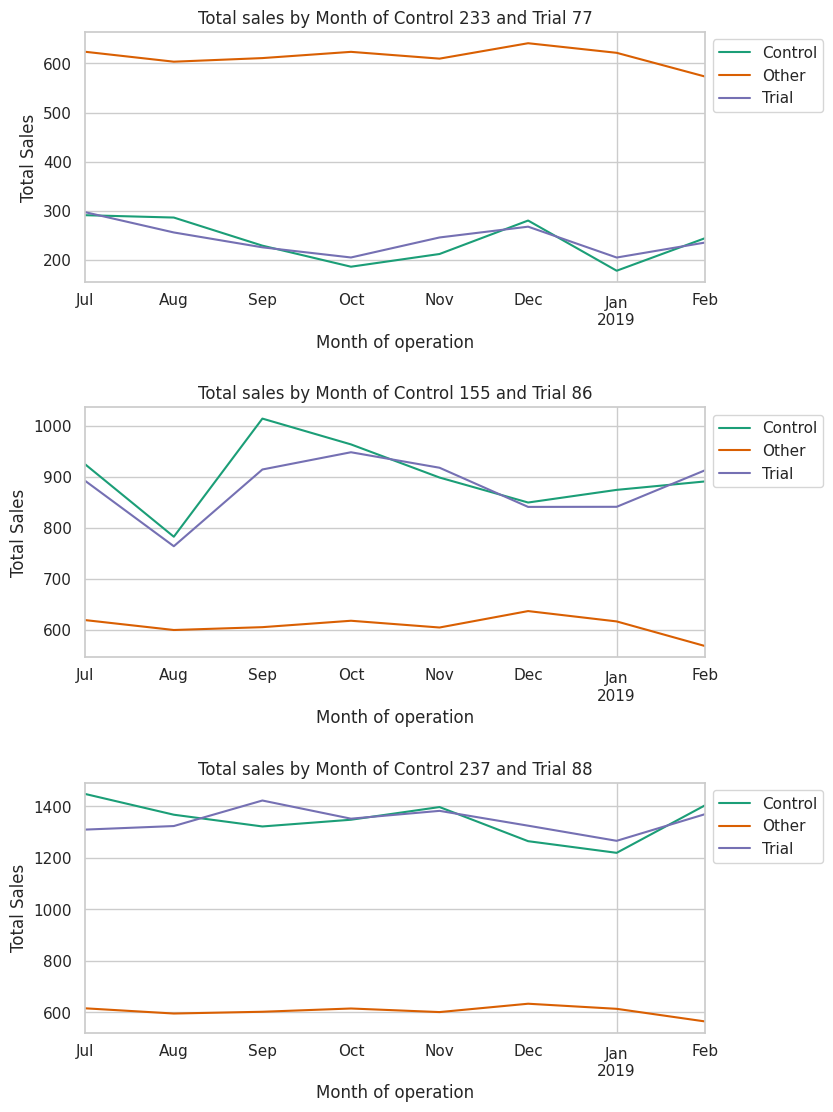

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=1, figsize = (8,13))
for i in range(3):
  measureOverTimeSales = df_OverTimebyMetric(control_store.loc[i,'Trial'],
                                             control_store.loc[i,'Control'],'totSales')
  measureOverTimeSales.unstack().plot(kind='line', ax = ax[i])
  ax[i].set_title("Total sales by Month of Control {} and Trial {}".format(control_store.loc[i,'Control'],control_store.loc[i,'Trial']))
  ax[i].legend(bbox_to_anchor=(1,1))
  ax[i].set_xlabel('Month of operation')
  ax[i].set_ylabel('Total Sales')
plt.subplots_adjust(hspace=0.5)
plt.show()

Next, we will check on Number of Customer

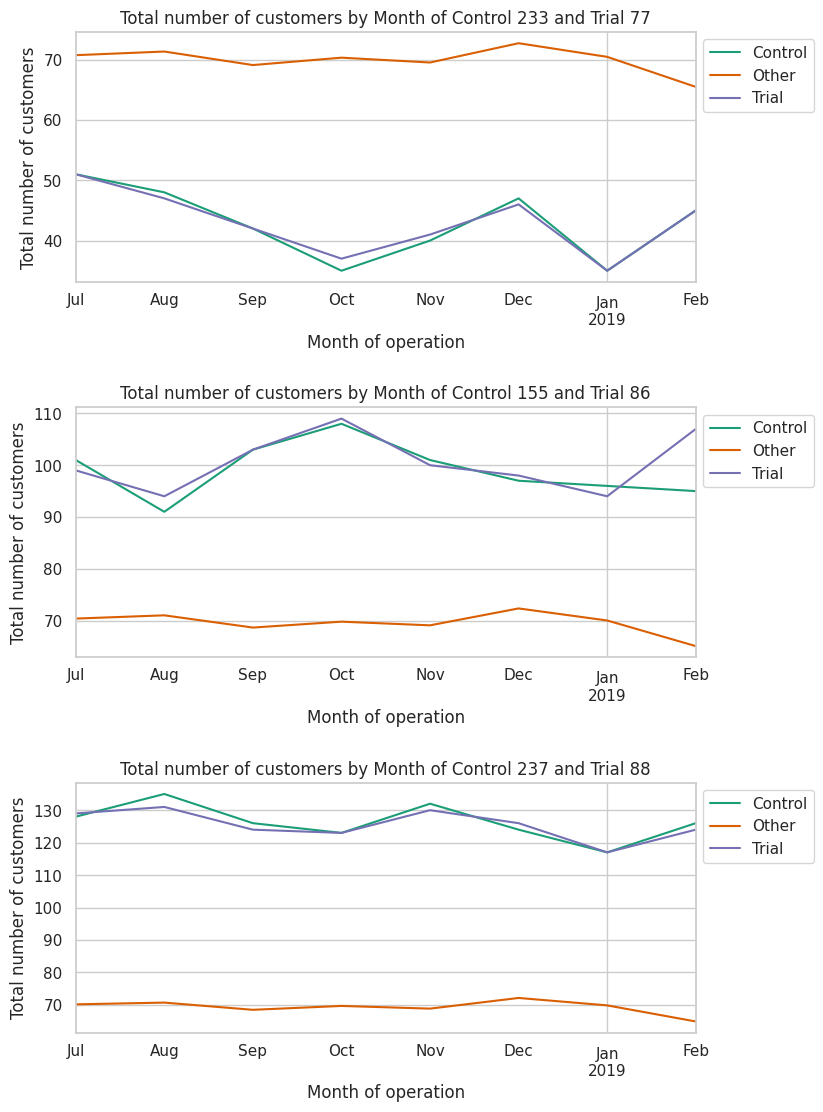

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=1, figsize = (8,13))
for i in range(3):
  measureOverTimeCust = df_OverTimebyMetric(control_store.loc[i,'Trial'],
                                             control_store.loc[i,'Control'],'nCustomers')
  measureOverTimeCust.unstack().plot(kind='line', ax = ax[i])
  ax[i].set_title("Total number of customers by Month of Control {} and Trial {}".format(control_store.loc[i,'Control'],control_store.loc[i,'Trial']))
  ax[i].legend(bbox_to_anchor=(1,1))
  ax[i].set_xlabel('Month of operation')
  ax[i].set_ylabel('Total number of customers')
plt.subplots_adjust(hspace=0.5)
plt.show()

# Assessment of trial

## Total Sales

We will analyze the period from March 2019 to June 2019 to determine if there has been an increase in overall chip sales. To reduce the total sales difference between Control store and Trial store, we will create new scaled total sales for the control store.

In [ ]:
def scaledControlTable(measureOverTime, preTrialMeasures, control, trial, nameCol):
  trial_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial)][nameCol].sum()
  control_sales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control)][nameCol].sum()
  scalingFactorForControlSales = trial_sales/control_sales
  scaledControlSales = measureOverTime[measureOverTime['STORE_NBR']== control].copy()
  scaledControlSales['Control'+nameCol] = scaledControlSales[nameCol] * scalingFactorForControlSales
  return scaledControlSales

In [ ]:
scaledControlSales = scaledControlTable(measureOverTime, preTrialMeasures, 233, 77, 'totSales')
scaledControlSales

,YEAR_MONTH,STORE_NBR,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,ControltotSales
227,2018-07,233,290.7,51,1.058824,1.629630,3.303409,297.565550
489,2018-08,233,285.9,48,1.041667,1.600000,3.573750,292.652187
754,2018-09,233,228.6,42,1.071429,1.555556,3.265714,233.998916
1019,2018-10,233,185.7,35,1.028571,1.555556,3.316071,190.085733
1283,2018-11,233,211.6,40,1.025000,1.512195,3.412903,216.597421
1546,2018-12,233,279.8,47,1.063830,1.500000,3.730667,286.408121
1809,2019-01,233,177.5,35,1.000000,1.342857,3.776596,181.692071
2073,2019-02,233,244.0,45,1.044444,1.489362,3.485714,249.762622
2337,2019-03,233,199.1,40,1.025000,1.439024,3.374576,203.802205
2603,2019-04,233,158.6,30,1.066667,1.437500,3.447826,162.345704


So, we have scaled sales of control store. We will find the percentage difference between the scaled control sales and the trial sales during the trial period.

In [ ]:
def percentDiff(measureOverTime, preTrialMeasures, control, trial, nameCol):
  scaledControlSales = scaledControlTable(measureOverTime, preTrialMeasures, control, trial, nameCol)
  percentageDiff = pd.merge(scaledControlSales[['YEAR_MONTH'] +['Control'+nameCol]],
                          measureOverTime[measureOverTime['STORE_NBR'] == trial][['YEAR_MONTH']+[nameCol]],
                          on = 'YEAR_MONTH')
  percentageDiff['PercentageDiff'] = np.abs(percentageDiff['Control'+nameCol] - percentageDiff[nameCol])/percentageDiff['Control'+nameCol]
  return percentageDiff

In [ ]:
percentageDiff = percentDiff(measureOverTime, preTrialMeasures, 237, 88, 'totSales')
percentageDiff

,YEAR_MONTH,ControltotSales,totSales,PercentageDiff
0,2018-07,1450.657086,1310.00,0.096961
1,2018-08,1369.931485,1323.80,0.033674
2,2018-09,1324.260425,1423.00,0.074562
3,2018-10,1350.401097,1352.40,0.001480
4,2018-11,1399.777923,1382.80,0.012129
5,2018-12,1266.971288,1325.20,0.045959
6,2019-01,1221.600696,1266.40,0.036673
7,2019-02,1406.989143,1370.20,0.026147
8,2019-03,1210.082775,1477.20,0.220743
9,2019-04,1206.477165,1439.40,0.193060


Next, we'll examine the difference between the control and trial stores during the trial period.

1.  We will consider the stability of total sales in the control store. This means:

* $H_0$: The control store's performance in the Pre-Trial and Trial periods is the same.
* $H_1$: The control store's performance in the Pre-Trial and Trial periods is different.




In [ ]:
from scipy.stats import ttest_ind, ttest_1samp, t

In [ ]:
alpha = 0.05
for index, row in control_store.iterrows():
  print('Control Store:', row.Control, 'Trial Store:', row.Trial)
  scaledControlSales = scaledControlTable(measureOverTime, preTrialMeasures, row.Control, row.Trial, 'totSales')
  pre_trial = scaledControlSales[(scaledControlSales['YEAR_MONTH'] < '2019-02')]['ControltotSales']
  trail = scaledControlSales[(scaledControlSales['YEAR_MONTH'] >= '2019-02')]['ControltotSales']
  t_stat, p_val = ttest_ind(pre_trial, trail)
  df = min(pre_trial.shape[0], trail.shape[0]) - 1
  t_cv = t.ppf(1-alpha/2, df)
  print('t-value: ', t_stat, 'p-value: ', p_val)
  print('-------------------------')

print('t-critical value: ', t_cv)

Control Store: 233.0 Trial Store: 77.0
t-value:  0.10924629337722498 p-value:  0.9151682917332371
-------------------------
Control Store: 155.0 Trial Store: 86.0
t-value:  0.9702802459369667 p-value:  0.3547895432402083
-------------------------
Control Store: 237.0 Trial Store: 88.0
t-value:  2.061824399928198 p-value:  0.06618456932764787
-------------------------
t-critical value:  2.7764451051977987


We see that all of the $t_{value}$ lie within $[-t_{cv}, t_{cv}]$. Therefore, we cannot reject the Null Hypothesis, and all control stores are stable during all periods.

2. In pre-trial period, Are control and trial stores be statistically similar.
* $H_0$: The mean of total sale in pre-trial period of control store is same with trial store.
* $H_1$: The mean of total sale in pre-trial period of control store is different with trial store.

In [ ]:
for index, row in control_store.iterrows():
  print('Control Store:', row.Control, 'Trial Store:', row.Trial)
  scaledControlSales = scaledControlTable(measureOverTime, preTrialMeasures, row.Control, row.Trial, 'totSales')
  control_sales = scaledControlSales[(scaledControlSales['YEAR_MONTH'] < '2019-02')]['ControltotSales']
  trial_sales = measureOverTime[(measureOverTime['STORE_NBR'] == row.Trial) & (measureOverTime['YEAR_MONTH'] < '2019-02')]['totSales']
  t_stat, p_val = ttest_ind(control_sales, trial_sales)
  print('t-value: ', t_stat, 'p-value: ', p_val)
  print('-------------------------')

df = len(scaledControlSales[(scaledControlSales['YEAR_MONTH'] < '2019-02')]) - 1
print('t-critical value: ', t.ppf(1-alpha/2, df))

Control Store: 233.0 Trial Store: 77.0
t-value:  1.2533353315065932e-15 p-value:  0.999999999999999
-------------------------
Control Store: 155.0 Trial Store: 86.0
t-value:  -3.1048311203382156e-15 p-value:  0.9999999999999976
-------------------------
Control Store: 237.0 Trial Store: 88.0
t-value:  -6.4562888442484815e-15 p-value:  0.9999999999999949
-------------------------
t-critical value:  2.4469118511449692


All of the p-values are higher than $α = 0.05$, so we cannot reject the null hypothesis.

3. The null hypothesis of the first two steps is true. So, we will examine the Null hypothesis that the Percentage Difference between Trial and Control stores during pre-trial is the same as during trial or that each Percentage Difference in trial period are same with mean of Percentage Difference in pre-trial period.
* $H_0$: the mean of Percentage Difference in pre-trial period is same with each Percentage Difference in trial period
* $H_1$: the mean of Percentage Difference in pre-trial period is different with each Percentage Difference in trial period

In [ ]:
for index, row in control_store.iterrows():
  print('Control Store:', row.Control,'-', 'Trial Store:', row.Trial)
  percentageDiff = percentDiff(measureOverTime, preTrialMeasures, row.Control, row.Trial, 'totSales')
  pre_trial = percentageDiff[(percentageDiff['YEAR_MONTH'] < '2019-02')]['PercentageDiff']
  trial = percentageDiff[(percentageDiff['YEAR_MONTH'] >= '2019-02') & (percentageDiff['YEAR_MONTH'] <= '2019-04')][['YEAR_MONTH','PercentageDiff']]
  for ind, r in trial.iterrows():
    t_val, p_val = ttest_1samp(pre_trial, r.PercentageDiff)
    print('Month:', r.YEAR_MONTH, 't-value: ', t_val, 'p-value: ', p_val)
  print('-------------------------')
alpha = 0.05
df = len(pre_trial) - 1
t_cv = t.ppf(1-alpha/2, df)
print('t-critical value: ', t_cv)

Control Store: 233.0 - Trial Store: 77.0
Month: 2019-02 t-value:  1.1611341435834501 p-value:  0.28968960113880377
Month: 2019-03 t-value:  -15.12500308833203 p-value:  5.267524484575123e-06
Month: 2019-04 t-value:  -28.716909053266836 p-value:  1.1808980606756429e-07
-------------------------
Control Store: 155.0 - Trial Store: 86.0
Month: 2019-02 t-value:  -3.161016764019201 p-value:  0.01953983123600958
Month: 2019-03 t-value:  -29.743885735280735 p-value:  9.57660104852532e-08
Month: 2019-04 t-value:  -1.0048306853831297 p-value:  0.35376702807090166
-------------------------
Control Store: 237.0 - Trial Store: 88.0
Month: 2019-02 t-value:  1.3372028527762116 p-value:  0.2296178671173038
Month: 2019-03 t-value:  -14.046249122051844 p-value:  8.124118309658622e-06
Month: 2019-04 t-value:  -11.857839885309716 p-value:  2.1757444501122706e-05
-------------------------
t-critical value:  2.4469118511449692




*   Trial store 77: We reject Null hypothesis in March and April
*   Trial store 86: We reject Null hypothesis in Feburary and March
*   Trial store 88: We reject Null hypothesis in March and April



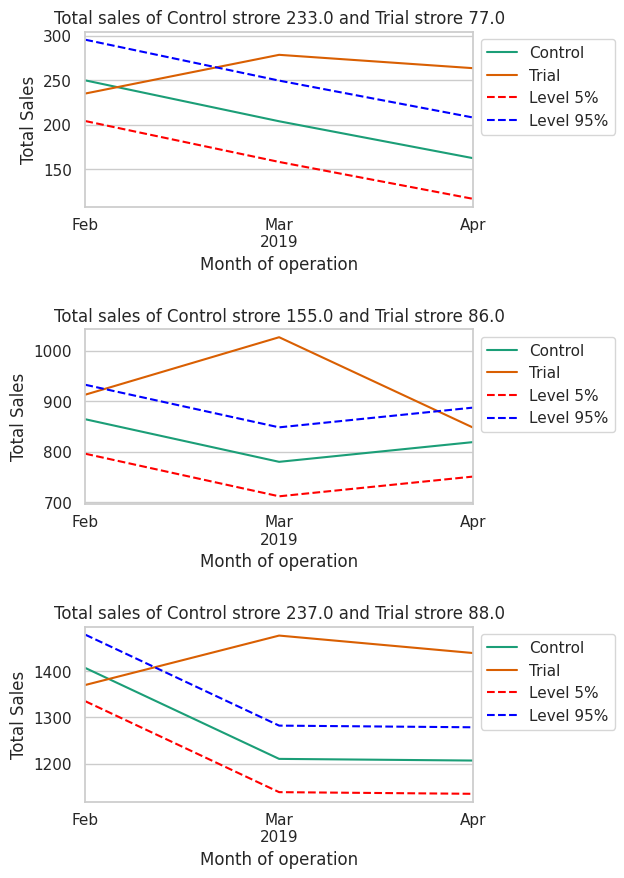

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=1, figsize = (5,10))
for index, row in control_store.iterrows():
  percentageDiff = percentDiff(measureOverTime, preTrialMeasures, row.Control, row.Trial, 'totSales')[['YEAR_MONTH','ControltotSales','totSales']]
  percentageDiff.columns = ['TIME', 'Control', 'Trial']
  trial_sales = percentageDiff[(percentageDiff['TIME'] >=  '2019-02') & (percentageDiff['TIME'] <=  '2019-04')]
  pre_trial_sales = percentageDiff[(percentageDiff['TIME'] < '2019-02')]
  alpha = 0.05
  df = len(pre_trial) - 1
  t_cv = t.ppf(1-alpha/2, df)
  std = pre_trial_sales['Control'].std()
  thresh5 = trial_sales.Control - t_cv*std/np.sqrt(len(pre_trial_sales))
  thresh95 = trial_sales.Control + t_cv*std/np.sqrt(len(pre_trial_sales))

  trial_sales.plot(kind='line', x = 'TIME', ax = ax[index])
  ax[index].plot(trial_sales['TIME'], thresh5, color='r', linestyle='--', label='Level 5%')
  ax[index].plot(trial_sales['TIME'], thresh95, color='b', linestyle='--', label='Level 95%')
  ax[index].set_title("Total sales of Control strore {} and Trial strore {}".format(row.Control,row.Trial))
  ax[index].legend(bbox_to_anchor=(1,1))
  ax[index].xaxis.set_tick_params(rotation=45)
  ax[index].set_xlabel('Month of operation')
  ax[index].set_ylabel('Total Sales')
plt.subplots_adjust(hspace=0.7)
plt.show()

With the above graph, the resutls of store 77 and store 88 were True. But on Feburary of Trial store 86, the total sales is kindly same with scaled total sales of COntrol store 155. So we will check again the Null hypothesis of Trial store 86 and Control store 155 at level 1%.

In [ ]:
alpha  = 0.01
trial  = 86
control = 155
print('Control Store:', control,'-', 'Trial Store:', trial)
percentageDiff = percentDiff(measureOverTime, preTrialMeasures, control, trial, 'totSales')
pre_trial = percentageDiff[(percentageDiff['YEAR_MONTH'] < '2019-02')]['PercentageDiff']
trial = percentageDiff[(percentageDiff['YEAR_MONTH'] >= '2019-02') & (percentageDiff['YEAR_MONTH'] <= '2019-04')][['YEAR_MONTH','PercentageDiff']]
for ind, r in trial.iterrows():
  t_val, p_val = ttest_1samp(pre_trial, r.PercentageDiff)
  print('Month:', r.YEAR_MONTH, 't-value: ', t_val, 'p-value: ', p_val)
print('-------------------------')
df = len(pre_trial) - 1
t_cv = t.ppf(1-alpha/2, df)
print('t-critical value: ', t_cv)

Control Store: 155 - Trial Store: 86
Month: 2019-02 t-value:  -3.161016764019201 p-value:  0.01953983123600958
Month: 2019-03 t-value:  -29.743885735280735 p-value:  9.57660104852532e-08
Month: 2019-04 t-value:  -1.0048306853831297 p-value:  0.35376702807090166
-------------------------
t-critical value:  3.707428021324907


Therefore, we can say that the Null hypothesis for Feburary was rejected at 1% significance level.
We conclude that:
* At level 5%, the total sales of the trial stores 77 and 188 increased at two of three months (trial period)
* At level 1%, the total sale of trial store 86 at one of three months (trial period)

## Number of customers

Following the steps for Total Sales,we will examine the hypothesis that the percentage difference in the number of customers before the trial is the same as during the trial period.

In [ ]:
# Examine the stability of the number of customers in the control strore
alpha = 0.05
for index, row in control_store.iterrows():
  print('Control Store:', row.Control, 'Trial Store:', row.Trial)
  scaledCustomers = scaledControlTable(measureOverTime, preTrialMeasures, row.Control, row.Trial, 'nCustomers')
  pre_trial = scaledCustomers[(scaledCustomers['YEAR_MONTH'] < '2019-02')]['ControlnCustomers']
  trail = scaledCustomers[(scaledCustomers['YEAR_MONTH'] >= '2019-02')]['ControlnCustomers']
  t_stat, p_val = ttest_ind(pre_trial, trail)
  df = min(pre_trial.shape[0], trail.shape[0]) - 1
  t_cv = t.ppf(1-alpha/2, df)
  print('t-value: ', t_stat, 'p-value: ', p_val)
  print('-------------------------')

print('t-critical value: ', t_cv)

Control Store: 233.0 Trial Store: 77.0
t-value:  -0.0061824584928582525 p-value:  0.9951887408487552
-------------------------
Control Store: 155.0 Trial Store: 86.0
t-value:  0.5732490005507832 p-value:  0.5791380709452707
-------------------------
Control Store: 237.0 Trial Store: 88.0
t-value:  1.1959329111377368 p-value:  0.2593100699570975
-------------------------
t-critical value:  2.7764451051977987


We see that all of the  tvalue  lie within  [−tcv,tcv] . Therefore, we cannot reject the Null Hypothesis, and all control stores are stable during all periods.

In [ ]:
# Examine whether the number of customers in the control store and the trial store have the same mean.
for index, row in control_store.iterrows():
  print('Control Store:', row.Control, 'Trial Store:', row.Trial)
  scaledCustomers = scaledControlTable(measureOverTime, preTrialMeasures, row.Control, row.Trial, 'nCustomers')
  control_sales = scaledCustomers[(scaledCustomers['YEAR_MONTH'] < '2019-02')]['ControlnCustomers']
  trial_sales = measureOverTime[(measureOverTime['STORE_NBR'] == row.Trial) & (measureOverTime['YEAR_MONTH'] < '2019-02')]['nCustomers']
  t_stat, p_val = ttest_ind(control_sales, trial_sales)
  print('t-value: ', t_stat, 'p-value: ', p_val)
  print('-------------------------')

df = len(scaledCustomers[(scaledCustomers['YEAR_MONTH'] < '2019-02')]) - 1
print('t-critical value: ', t.ppf(1-alpha/2, df))

Control Store: 233.0 Trial Store: 77.0
t-value:  0.0 p-value:  1.0
-------------------------
Control Store: 155.0 Trial Store: 86.0
t-value:  0.0 p-value:  1.0
-------------------------
Control Store: 237.0 Trial Store: 88.0
t-value:  0.0 p-value:  1.0
-------------------------
t-critical value:  2.4469118511449692


We cannot reject the Null Hypothesis, which means they have the same mean in the pre-trial period.

In [ ]:
# Examine the hypothesis that the percentage difference in the number of customers before the trial is the same as during the trial period.
for index, row in control_store.iterrows():
  print('Control Store:', row.Control,'-', 'Trial Store:', row.Trial)
  percentageDiff = percentDiff(measureOverTime, preTrialMeasures, row.Control, row.Trial, 'nCustomers')
  pre_trial = percentageDiff[(percentageDiff['YEAR_MONTH'] < '2019-02')]['PercentageDiff']
  trial = percentageDiff[(percentageDiff['YEAR_MONTH'] >= '2019-02') & (percentageDiff['YEAR_MONTH'] <= '2019-04')][['YEAR_MONTH','PercentageDiff']]
  for ind, r in trial.iterrows():
    t_val, p_val = ttest_1samp(pre_trial, r.PercentageDiff)
    print('Month:', r.YEAR_MONTH, 't-value: ', t_val, 'p-value: ', p_val)
  print('-------------------------')
alpha = 0.05
df = len(pre_trial) - 1
t_cv = t.ppf(1-alpha/2, df)
print('t-critical value: ', t_cv)

Control Store: 233.0 - Trial Store: 77.0
Month: 2019-02 t-value:  2.2888145443542314 p-value:  0.06204484844577368
Month: 2019-03 t-value:  -32.8812513049325 p-value:  5.2638589045222246e-08
Month: 2019-04 t-value:  -78.65893241726846 p-value:  2.8425655160011156e-10
-------------------------
Control Store: 155.0 - Trial Store: 86.0
Month: 2019-02 t-value:  -27.625187052694503 p-value:  1.4877966066066844e-07
Month: 2019-03 t-value:  -51.66011242324202 p-value:  3.5302987846600825e-09
Month: 2019-04 t-value:  -11.358286389478184 p-value:  2.789801879252139e-05
-------------------------
Control Store: 237.0 - Trial Store: 88.0
Month: 2019-02 t-value:  0.9583185628668915 p-value:  0.37490857474743977
Month: 2019-03 t-value:  -42.66016603020968 p-value:  1.1102377938604445e-08
Month: 2019-04 t-value:  -21.337341435751522 p-value:  6.910885043333385e-07
-------------------------
t-critical value:  2.4469118511449692



*   Trial store 77: We reject Null hypothesis in March and April
*   Trial store 86: We reject Null hypothesis all months in trial period
*   Trial store 88: We reject Null hypothesis in March and April

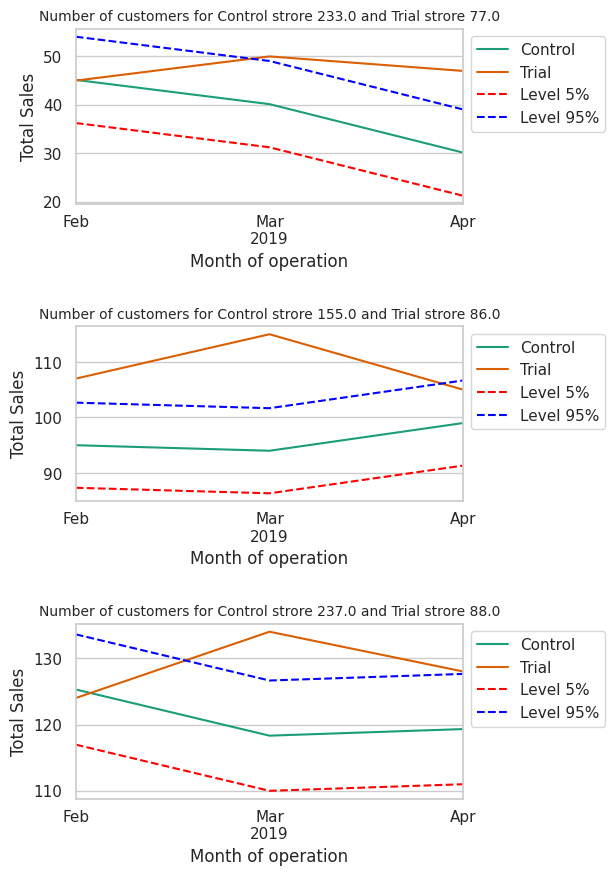

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=1, figsize = (5,10))
for index, row in control_store.iterrows():
  percentageDiff = percentDiff(measureOverTime, preTrialMeasures, row.Control, row.Trial, 'nCustomers')[['YEAR_MONTH','ControlnCustomers','nCustomers']]
  percentageDiff.columns = ['TIME', 'Control', 'Trial']
  trial_sales = percentageDiff[(percentageDiff['TIME'] >=  '2019-02') & (percentageDiff['TIME'] <=  '2019-04')]

  pre_trial_sales = percentageDiff[(percentageDiff['TIME'] < '2019-02')]
  std = pre_trial_sales['Control'].std()
  thresh5 = trial_sales.Control - t_cv*std/np.sqrt(len(pre_trial_sales))
  thresh95 = trial_sales.Control + t_cv*std/np.sqrt(len(pre_trial_sales))

  trial_sales.plot(kind='line', x = 'TIME', ax = ax[index])
  ax[index].plot(trial_sales['TIME'], thresh5, color='r', linestyle='--', label='Level 5%')
  ax[index].plot(trial_sales['TIME'], thresh95, color='b', linestyle='--', label='Level 95%')
  ax[index].set_title("Number of customers for Control strore {} and Trial strore {}".format(row.Control,row.Trial), fontsize = 10)
  ax[index].legend(bbox_to_anchor=(1,1))
  ax[index].xaxis.set_tick_params(rotation=45)
  ax[index].set_xlabel('Month of operation')
  ax[index].set_ylabel('Total Sales')
plt.subplots_adjust(hspace=0.7)
plt.show()

In [ ]:
alpha  = 0.1
trial  = 86
control = 155
print('Control Store:', control,'-', 'Trial Store:', trial)
percentageDiff = percentDiff(measureOverTime, preTrialMeasures, control, trial, 'nCustomers')
pre_trial = percentageDiff[(percentageDiff['YEAR_MONTH'] < '2019-02')]['PercentageDiff']
trial = percentageDiff[(percentageDiff['YEAR_MONTH'] >= '2019-02') & (percentageDiff['YEAR_MONTH'] <= '2019-04')][['YEAR_MONTH','PercentageDiff']]
for ind, r in trial.iterrows():
  t_val, p_val = ttest_1samp(pre_trial, r.PercentageDiff)
  print('Month:', r.YEAR_MONTH, 't-value: ', t_val, 'p-value: ', p_val)
print('-------------------------')
df = len(pre_trial) - 1
t_cv = t.ppf(1-alpha/2, df)
print('t-critical value: ', t_cv)

Control Store: 155 - Trial Store: 86
Month: 2019-02 t-value:  -27.625187052694503 p-value:  1.4877966066066844e-07
Month: 2019-03 t-value:  -51.66011242324202 p-value:  3.5302987846600825e-09
Month: 2019-04 t-value:  -11.358286389478184 p-value:  2.789801879252139e-05
-------------------------
t-critical value:  1.9431802805153022


Conclude, we can see a significant difference in the number of customers between the control stores and the trial stores.

# Conclusion
We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
There are two months in trial period have the significant difference for the trial stores 77 and 88. However, the trial store 86 shows are different results. At the 1% significance level, there is a one month have the total sales' trial store higher than control store. And the number of customers increased greatly during the trial period. So, we can say that the new layout for a chips category affects the number of customers.
